In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import lib_import_other_datasource as imoda


In [2]:
np.sqrt(15**2+30**2)

33.54101966249684

In [3]:
with open('../data/generated_data/kapitel4/timeseries/timeseries_ele5_32_azi265_340_time39_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

key_list = ['0811_2','0811_3',
            '0907_2','0907_3',
            '1004_2','1004_3',
            '1031_2','1031_3',
            '1127_2','1127_3',
            '0216_1','0216_2']

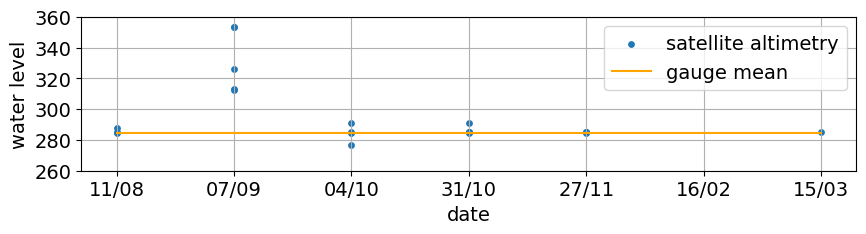

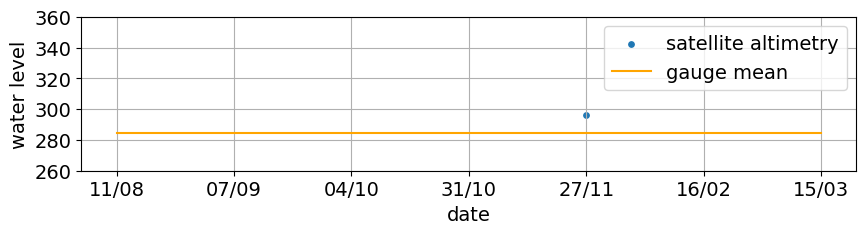

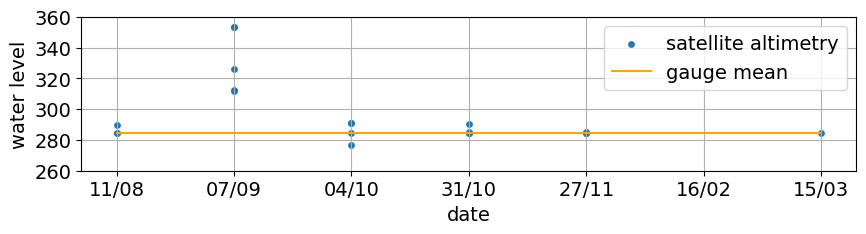

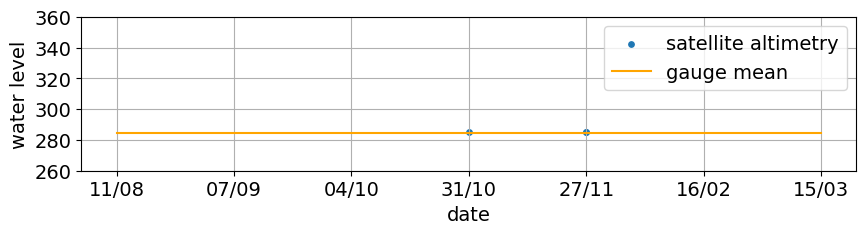

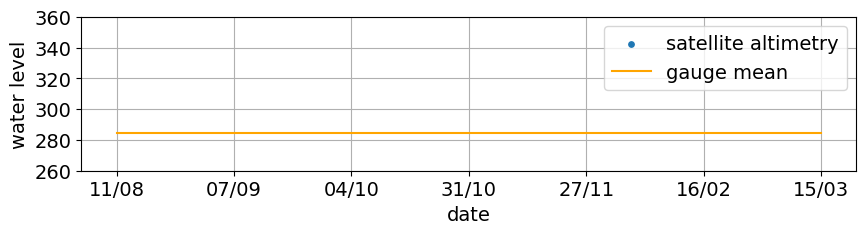

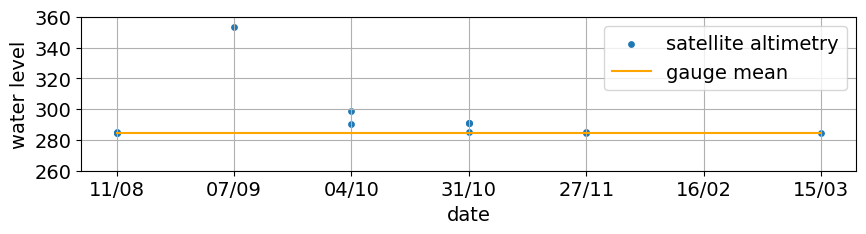

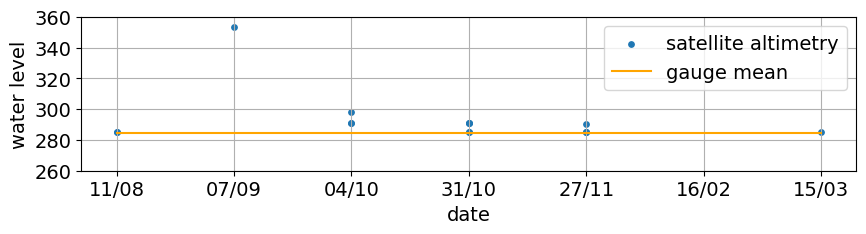

In [6]:
retrack_method = ['OCES','OCEP','OGS','ISS','ICES','ICEP','SICS']
plt.rcParams.update({'font.size': 14})
date_list = {'20220811':0,'20220907':1,'20221004':2,'20221031':3,'20221127':4,'20230216':5,'20230315':6}
sentinel = {}
for rm in retrack_method:
    sentinel[rm] = {}
    for yeardate in date_list:
        sentinel[rm][yeardate] = np.asarray(list(imoda.get_sentinel_data(yeardate,rm).values()))


for rm, data in sentinel.items():
    x = []
    y = []
    for i,(d, data2) in enumerate(data.items()):
        for h in data2:
            x.append(i)
            y.append(h)
    fig,ax = plt.subplots()
    fig.set_size_inches(10,2)
    ax.scatter(x,y,s=15)
    ax.plot([0,6],[284.5,284.5],color='orange')
    ax.legend(['satellite altimetry','gauge mean'])
    ax.set_ylim([260,360])
    ax.set_yticks([260,280,300,320,340,360])
    ax.set_xlabel('date')
    ax.set_ylabel('water level')
    ax.grid()
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(['11/08','07/09','04/10','31/10','27/11','16/02','15/03'])
    #ax.set_title(f'Satellite altimetry using retracker {rm}')
    fig.savefig(f'../../write/bilder/kapitel4/sentinel_{rm}.png',bbox_inches='tight')
# ax.legend(retrack_method)

    

In [7]:
sentinel

{'OCES': {'20220811': array([284.7372, 284.8736, 287.627 ]),
  '20220907': array([312.4325, 313.0766, 326.1471, 353.2352, 353.3674]),
  '20221004': array([276.7121, 284.8021, 284.8308, 290.7732]),
  '20221031': array([284.9172, 284.7501, 290.6722, 285.0678, 285.4032]),
  '20221127': array([284.8782, 284.7188, 284.9523, 285.2098]),
  '20230216': array([], dtype=float64),
  '20230315': array([284.9305])},
 'OCEP': {'20220811': array([nan, nan, nan]),
  '20220907': array([nan, nan, nan, nan, nan]),
  '20221004': array([nan, nan, nan, nan]),
  '20221031': array([nan, nan, nan, nan, nan]),
  '20221127': array([     nan,      nan, 296.3609,      nan]),
  '20230216': array([], dtype=float64),
  '20230315': array([nan])},
 'OGS': {'20220811': array([284.5995, 284.597 , 289.4896]),
  '20220907': array([311.4509, 312.7021, 325.9485, 353.0604, 353.3175]),
  '20221004': array([276.7677, 284.6454, 290.7226, 290.6954]),
  '20221031': array([284.7787, 284.594 , 290.5272, 284.7685, 285.0828]),
  '2022